In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('/content/calories.csv')

In [66]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [67]:
df.shape

(15000, 2)

In [68]:
df.isnull().sum()

,0
User_ID,0
Calories,0


In [69]:
df_two = pd.read_csv('/content/exercise.csv')

In [70]:
df_two.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [71]:
df_two.shape

(15000, 8)

In [72]:
df_two.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [73]:
X = df_two.drop('User_ID', axis=1)

In [74]:
Y = df['Calories']

In [75]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [76]:
Y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [77]:
# turn gender into numerical values
X['Gender'] = X['Gender'].map({'male': 1, 'female': 0})

In [78]:
X['Gender'].value_counts()

,count
Gender,
0,7553
1,7447


In [79]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [85]:
model = XGBRegressor(kernel='linear')

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, kernel='linear', learning_rate=None,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [87]:
model.score(X_train, Y_train)

0.9995777219604748

In [88]:
model.score(X_test, Y_test)

0.9988678909361673

In [90]:
input_data = (1,	68,	190.0,	94.0,	29.0,	105.0,	40.8)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[234.31616]


In [91]:
X_train_prediction = model.predict(X_train)
training_data_error = mean_absolute_error(X_train_prediction, Y_train)

<Axes: ylabel='Calories'>

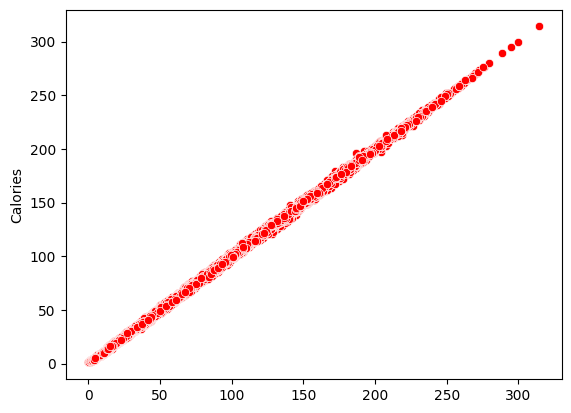

In [94]:
sns.scatterplot(x=X_train_prediction, y=Y_train, color='red')
